<a href="https://colab.research.google.com/github/random-words/colab-notebooks/blob/main/00__tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Creating tensors with `tf.constant`

In [75]:
# Import TenforFlow
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.17.1


In [2]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# Check the number of dimentions (ndim)
scalar.ndim

0

In [4]:
# Create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [5]:
# Check the number of dimentions for vector
vector.ndim

1

In [6]:
# Create a matrix (more than 1 dimention)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [7]:
# Check the number of dimentions for matrix
matrix.ndim

2

In [8]:
# Create another matrix
another_matrix = tf.constant([[1., 2.],
                              [3., 4.],
                              [5., 6.]], dtype=tf.float16) # specify the data dype
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)>

In [9]:
another_matrix.ndim

2

In [10]:
# Create tensor
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [11]:
# Check ndim
tensor.ndim

3

### Creating tensors with `tf.Variable`

In [12]:
changable_tensor = tf.Variable([10, 7])
unchangable_tensor = tf.constant([10, 7])

changable_tensor, unchangable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [13]:
# Indexes just like in arrays
changable_tensor[0]

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [15]:
# Trying to change value "on place"
changable_tensor[0] = 7
changable_tensor[0]

TypeError: 'ResourceVariable' object does not support item assignment

In [16]:
# using .assign method
changable_tensor[0].assign(7)
changable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [17]:
# Cannot assign value in any way
unchangable_tensor[0].assign(7)
unchangable_tensor[0] = 7

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

### Creating random tensors

In [ ]:
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3, 2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))

random_1, random_2, random_1 == random_2

### Shuffle tensor

In [ ]:
# Create tensor
not_shuffled = tf.constant([[1, 2], [3, 4], [5, 6]])

# Shuffle tensor
tf.random.shuffle(not_shuffled)

In [ ]:
tf.random.set_seed(42) # global level seed
tf.random.shuffle(not_shuffled, seed=42) # operation level seed

In [ ]:
tf.random.shuffle(not_shuffled)

### Other ways to make tensors

In [ ]:
# "all ones" tensor
tf.ones([10, 7])

In [ ]:
# "all zeroes" tensor
tf.zeros((3, 4))

### Turn NumPy arrays into tensors

Main difference is that tensors can run on GPU (for faster numerical computing)

In [ ]:
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32)
numpy_A

In [ ]:
# convert numpy array into tensor
A = tf.constant(numpy_A, shape=(2, 3, 4)) # convert to 3 dimentions
B = tf.constant(numpy_A)
A, B

In [ ]:
tf.constant(numpy_A, shape=(3, 8))

In [ ]:
A.ndim

### Tensor attributes

Popular attributes:
* Shape
* Rank
* Axis or dimention
* Size

In [ ]:
# Create rank 4 dimentions
rank_4_tensor = tf.zeros(shape=[2,3,4,5])
rank_4_tensor

In [ ]:
rank_4_tensor[0]

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

In [ ]:
print("Datatype of each element:", rank_4_tensor.dtype)
print("Number of dimentions (rank):", rank_4_tensor.ndim)
print("Tensor's shape:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along last axis of tensor:", rank_4_tensor.shape[-1])
print("Totan number of tensors:", tf.size(rank_4_tensor))
print("Totan number of tensors as numpy type:", tf.size(rank_4_tensor).numpy())

### Indexing tensors

Indexation as Python lists

In [ ]:
some_list = [1,2,3,4]
some_list[:2]

In [ ]:
# get the first 2 elements of each dimentions
rank_4_tensor[:2, :2, :2, :2]

In [ ]:
rank_4_tensor.shape

In [18]:
rank_4_tensor[:1, :1, :1, :1]

NameError: name 'rank_4_tensor' is not defined

In [ ]:
rank_4_tensor[:1, :1, :1, :]

In [ ]:
rank_4_tensor[:1, :1, :, :1]

In [19]:
# Create rank 2 tensor (2 dimentions)
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4]])
rank_2_tensor, rank_2_tensor.shape, rank_2_tensor.ndim

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]], dtype=int32)>,
 TensorShape([2, 2]),
 2)

In [20]:
# Last item of each row
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 4], dtype=int32)>

In [21]:
# Add an extra dimention to rank_2_tensor
# '...' - means all of the axes, and we add new axis to them in the end
# '[..., tf.newaxis]' is the same as '[:, :, tf.newaxis]'
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[1],
        [2]],

       [[3],
        [4]]], dtype=int32)>

In [22]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # '-1' means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[1],
        [2]],

       [[3],
        [4]]], dtype=int32)>

In [23]:
tf.expand_dims(rank_2_tensor, axis=0) # expand 0-axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]]], dtype=int32)>

In [24]:
# which axis (or index, if talking about shape) is specified, is inserted there
tf.expand_dims(rank_2_tensor, axis=1) # expand 1-axis

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[1, 2]],

       [[3, 4]]], dtype=int32)>

### Tensor operations

**Basic operations:**
`+`, `-`, `*`, `/`,

In [25]:
# Adding
tensor = tf.constant([[1, 2],
                      [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11, 12],
       [13, 14]], dtype=int32)>

In [26]:
# Muiltiplication
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 20],
       [30, 40]], dtype=int32)>

In [27]:
# Subtraction
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[-9, -8],
       [-7, -6]], dtype=int32)>

In [28]:
# Can use built-in functions too
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 20],
       [30, 40]], dtype=int32)>

In [29]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

### Matrix multiplication

**Numbers on the `inside` must match (3x`3` <---> `3`x2)**

**New size is the same as outer numbers (3x2, because `3`x3 <---> 3x`2`)**

In [30]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [31]:
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 7, 10],
       [15, 22]], dtype=int32)>

In [32]:
tensor * tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 1,  4],
       [ 9, 16]], dtype=int32)>

In [33]:
# '@' in Python for matrix multiplication
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 7, 10],
       [15, 22]], dtype=int32)>

In [34]:
# Create matrix in shape (3, 2)
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])
# Create another matrix in shape (3, 2)
Y = tf.constant([[11, 12],
                 [13, 14],
                 [15, 16]])

X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[11, 12],
        [13, 14],
        [15, 16]], dtype=int32)>)

In [36]:
# Try to matrix multiply matrices with the same shape
X @ Y

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

In [37]:
# Try to matrix multiply matrices with .matmul
tf.matmul(X, Y)

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

In [38]:
# Transpose use
tf.transpose(Y)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11, 13, 15],
       [12, 14, 16]], dtype=int32)>

In [39]:
X @ tf.transpose(Y)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 35,  41,  47],
       [ 81,  95, 109],
       [127, 149, 171]], dtype=int32)>

In [40]:
Y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 12],
       [13, 14],
       [15, 16]], dtype=int32)>

In [41]:
# Or reshape (more correct option)
tf.reshape(Y, (2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11, 12, 13],
       [14, 15, 16]], dtype=int32)>

In [42]:
X.shape, tf.reshape(Y, (2, 3)).shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [43]:
X @ tf.reshape(Y, (2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 39,  42,  45],
       [ 89,  96, 103],
       [139, 150, 161]], dtype=int32)>

In [44]:
tf.matmul(X, tf.reshape(Y, (2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 39,  42,  45],
       [ 89,  96, 103],
       [139, 150, 161]], dtype=int32)>

In [45]:
tf.reshape(X, (2, 3)).shape, Y.shape

(TensorShape([2, 3]), TensorShape([3, 2]))

In [46]:
# Changing shape of X instead of Y
tf.matmul(tf.reshape(X, (2, 3)), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 82,  88],
       [199, 214]], dtype=int32)>

In [47]:
# Again, transpose
X, tf.transpose(X), tf.reshape(X, (2, 3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [48]:
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[125, 134],
       [164, 176]], dtype=int32)>

**The Dot Product (Matrix Multiplication)**

* `tf.matmul()`
* `tf.tensordot()`
* `@`

In [49]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[11, 12],
        [13, 14],
        [15, 16]], dtype=int32)>)

In [50]:
# Transposing X
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[125, 134],
       [164, 176]], dtype=int32)>

In [51]:
# Transposing Y
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 35,  41,  47],
       [ 81,  95, 109],
       [127, 149, 171]], dtype=int32)>

In [52]:
# Reshaping Y
tf.matmul(X, tf.reshape(Y, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 39,  42,  45],
       [ 89,  96, 103],
       [139, 150, 161]], dtype=int32)>

In [53]:
# if needed to choose reshaping or transposing, usually choose transposing

### Changing datatype of a tensor

In [54]:
# Create tensor with float datatype
B = tf.constant([1.7, 2.5])
B, B.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 2.5], dtype=float32)>,
 tf.float32)

In [55]:
C = tf.constant([2, 3])
C.dtype

tf.int32

In [56]:
# Change from float32 to float16 (this is called "reduced precision")
D = tf.cast(B, dtype=tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 2.5], dtype=float16)>,
 tf.float16)

In [57]:
# Change from int32 to float32
E = tf.cast(C, dtype=tf.float32)
E

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [58]:
E_float16 = tf.cast(C, dtype=tf.float16)
E_float16

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([2., 3.], dtype=float16)>

### Aggregating tensors

In [59]:
# Get the absolute value
tensor = tf.constant([-7, -10])
tf.abs(tensor)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

In [76]:
tensor = tf.constant(np.random.randint(0, 100, size=50))
tensor

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([50, 98, 58, 25, 92, 25, 49, 31, 64, 38, 48, 42, 88, 40, 57, 28, 62,
       64, 39, 80, 26, 51, 81, 37, 53, 98, 30, 82, 82, 74, 73, 87, 40, 63,
       71, 74, 63,  1, 70, 69, 30, 73,  9, 96, 97, 99, 78, 21, 70, 58])>

In [77]:
tf.size(tensor), tensor.shape, tensor.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [78]:
# Find minimum
tf.reduce_min(tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [79]:
# Find maximum
tf.reduce_max(tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=99>

In [80]:
# Find mean
tf.reduce_mean(tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=58>

In [81]:
# Find sum
tf.reduce_sum(tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=2934>

In [82]:
# Find variance
tf.math.reduce_variance(tf.cast(tensor, dtype=tf.float16))

<tf.Tensor: shape=(), dtype=float16, numpy=616.0>

In [83]:
# Find standard deviation
tf.math.reduce_std(tf.cast(tensor, dtype=tf.float16))

<tf.Tensor: shape=(), dtype=float16, numpy=24.81>

In [84]:
# Or using tensorflow_probability
import tensorflow_probability as tfp

In [85]:
tfp.stats.variance(tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=616>

### Finding positional maximuim and minimum

In [86]:
tf.random.set_seed(42)
tensor = tf.random.uniform([50])
tensor

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [87]:
# Find the positional maximum (index with a most higher value)
tf.argmax(tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [88]:
np.argmax(tensor)

42

In [89]:
tensor[tf.argmax(tensor)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [90]:
# Find the max value of "tensor"
tf.reduce_max(tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [91]:
tensor[tf.argmax(tensor)] == tf.reduce_max(tensor)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [92]:
# Find positional minimum
tf.argmin(tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [93]:
# Find minimum using index
tensor[tf.argmin(tensor)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

### Squeezing a tensor (removing all single dimentions)

In [94]:
tf.random.set_seed(42)
tensor = tf.constant(tf.random.uniform([50]), shape=(1,1,1,1,50))
tensor

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [95]:
tensor.shape

TensorShape([1, 1, 1, 1, 50])

In [96]:
squeezed_tensor = tf.squeeze(tensor)
squeezed_tensor, squeezed_tensor.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>,
 TensorShape([50]))

### One-hot encoding tensors

In [97]:
some_list = [0, 1, 2, 3] # representation of some colors

tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

### Squaring, log, square root

In [98]:
tensor = tf.range(1, 10)
tensor

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [99]:
tensor ** 2

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [100]:
# degree of 2
tf.square(tensor)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [101]:
# sqrt
tf.sqrt(tf.cast(tensor, tf.float16))

<tf.Tensor: shape=(9,), dtype=float16, numpy=
array([1.   , 1.414, 1.732, 2.   , 2.236, 2.45 , 2.646, 2.828, 3.   ],
      dtype=float16)>

In [102]:
# log
tf.math.log(tf.cast(tensor, tf.float16))

<tf.Tensor: shape=(9,), dtype=float16, numpy=
array([0.    , 0.6934, 1.099 , 1.387 , 1.609 , 1.792 , 1.946 , 2.08  ,
       2.197 ], dtype=float16)>

### Tensors and NumPy

In [103]:
tensor_np = tf.constant(np.array([3., 7., 10.]))
tensor_np

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [104]:
# Convert tensor to NumPy array
np.array(tensor_np), type(np.array(tensor_np))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [105]:
# Convert tensor using method
tensor_np.numpy(), type(tensor_np.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [106]:
tensor_np.numpy()[0]

3.0

In [107]:
# Default dtypes are different
numpy_tensor = tf.constant(np.array([3., 7., 10.]))
tensor = tf.constant([3., 7., 10.])

numpy_tensor.dtype, tensor.dtype

(tf.float64, tf.float32)

### Access to GPU

In [108]:
import tensorflow as tf

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [109]:
!nvidia-smi

Tue Jan 21 18:43:20 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0              29W /  70W |    107MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### **Exercises**

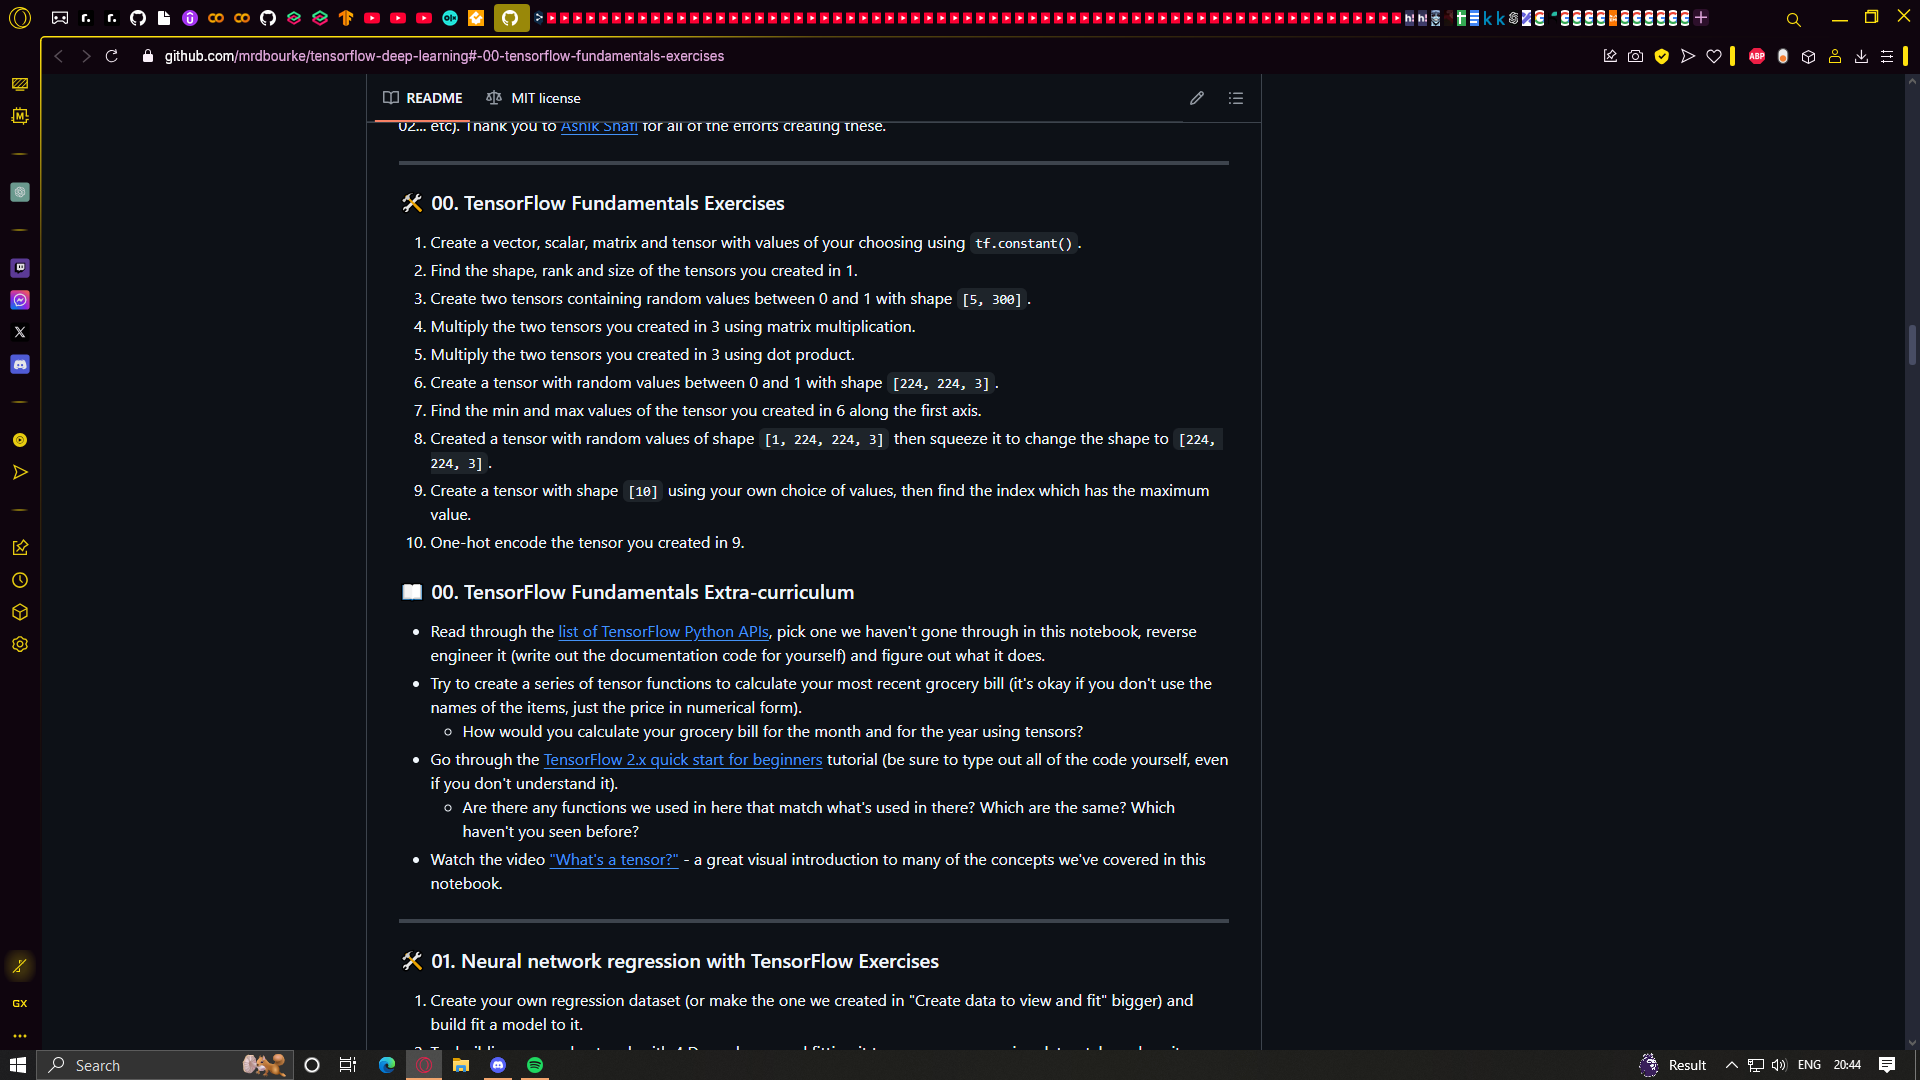

**Create a vector, scalar, matrix and tensor with values of your choosing using tf.constant().**

In [110]:
scalar = tf.constant(1)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [111]:
vector = tf.constant([1,2])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

In [112]:
matrix = tf.constant([[1,2], [3,4]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [113]:
tensor = tf.constant([[[1,2], [3,4]], [[5,6], [7, 8.]]])
tensor

<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[1., 2.],
        [3., 4.]],

       [[5., 6.],
        [7., 8.]]], dtype=float32)>

**Find the shape, rank and size of the tensors you created in 1.**

In [114]:
tensor.shape, tensor.ndim, tf.size(tensor)

(TensorShape([2, 2, 2]), 3, <tf.Tensor: shape=(), dtype=int32, numpy=8>)

**Create two tensors containing random values between 0 and 1 with shape [5, 300].**

In [116]:
random_tensor_1 = tf.random.uniform([5, 300], 0, 1)
random_tensor_2 = tf.random.uniform([5, 300], 0, 1)
random_tensor_1, random_tensor_2

(<tf.Tensor: shape=(5, 300), dtype=float32, numpy=
 array([[0.7413678 , 0.62854624, 0.01738465, ..., 0.4851334 , 0.21059811,
         0.25082767],
        [0.10842848, 0.48783147, 0.8240961 , ..., 0.9204427 , 0.36046863,
         0.28176582],
        [0.7326695 , 0.46489418, 0.13622475, ..., 0.28130388, 0.63987684,
         0.9987265 ],
        [0.01447165, 0.7845044 , 0.33475304, ..., 0.56194997, 0.0209924 ,
         0.1740731 ],
        [0.90936875, 0.19861352, 0.9481231 , ..., 0.3573054 , 0.13161755,
         0.22565222]], dtype=float32)>,
 <tf.Tensor: shape=(5, 300), dtype=float32, numpy=
 array([[0.7402308 , 0.33938193, 0.5692506 , ..., 0.08656633, 0.19666708,
         0.7110305 ],
        [0.13257599, 0.81292987, 0.01284087, ..., 0.02695906, 0.2927854 ,
         0.06227863],
        [0.282601  , 0.47868013, 0.77569485, ..., 0.28239357, 0.632112  ,
         0.44452012],
        [0.02029276, 0.7841259 , 0.16919017, ..., 0.26143157, 0.43055534,
         0.47421408],
        [0.26160

**Multiply the two tensors you created in 3 using matrix multiplication.**

In [119]:
random_tensor_1 * random_tensor_2

<tf.Tensor: shape=(5, 300), dtype=float32, numpy=
array([[5.48783302e-01, 2.13317230e-01, 9.89622157e-03, ...,
        4.19962183e-02, 4.14177142e-02, 1.78346112e-01],
       [1.43750124e-02, 3.96572769e-01, 1.05821081e-02, ...,
        2.48142723e-02, 1.05539955e-01, 1.75479893e-02],
       [2.07053125e-01, 2.22535610e-01, 1.05668835e-01, ...,
        7.94384107e-02, 4.04473841e-01, 4.43954021e-01],
       [2.93669698e-04, 6.15150273e-01, 5.66369221e-02, ...,
        1.46911472e-01, 9.03838966e-03, 8.25479180e-02],
       [2.37898037e-01, 1.81523582e-03, 1.92062274e-01, ...,
        1.26778647e-01, 1.30817026e-01, 7.95180276e-02]], dtype=float32)>

**Multiply the two tensors you created in 3 using dot product.**

In [120]:
random_tensor_1 @ tf.transpose(random_tensor_2)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[72.63512 , 73.275154, 72.47875 , 73.89535 , 77.069084],
       [76.148026, 77.387215, 76.156   , 78.4779  , 77.93585 ],
       [74.06138 , 75.798744, 74.00404 , 74.954445, 74.857666],
       [72.61861 , 77.07387 , 72.674484, 75.91608 , 73.15647 ],
       [74.65548 , 76.221756, 75.43701 , 76.920525, 76.65762 ]],
      dtype=float32)>

**Create a tensor with random values between 0 and 1 with shape [224, 224, 3].**

In [123]:
random_tensor_3 = tf.random.uniform((224, 224, 3), 0, 1)
# random_tensor_3

**Find the min and max values of the tensor you created in 6 along the first axis.**

In [126]:
tf.reduce_max(random_tensor_3)

<tf.Tensor: shape=(), dtype=float32, numpy=0.99999976>

In [127]:
tf.reduce_min(random_tensor_3)

<tf.Tensor: shape=(), dtype=float32, numpy=3.2186508e-06>

**Created a tensor with random values of shape [1, 224, 224, 3] then squeeze it to change the shape to [224, 224, 3].**

In [129]:
random_tensor_4 = tf.random.uniform((1, 224, 224, 3))
# tf.squeeze(random_tensor_4)

**Create a tensor with shape [10] using your own choice of values, then find the index which has the maximum value.**

In [136]:
random_tensor_5 = tf.random.uniform([10], 1, 10)
random_tensor_5

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([6.174435 , 2.7910538, 7.3344154, 1.4986924, 6.2961807, 5.887709 ,
       9.266871 , 4.3430066, 8.609894 , 9.912686 ], dtype=float32)>

In [137]:
tf.argmax(random_tensor_5)

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [138]:
random_tensor_5[tf.argmax(random_tensor_5)]

<tf.Tensor: shape=(), dtype=float32, numpy=9.912686>

**One-hot encode the tensor you created in 9.**

In [143]:
casted_5 = tf.cast(random_tensor_5, tf.int8)
casted_5

<tf.Tensor: shape=(10,), dtype=int8, numpy=array([6, 2, 7, 1, 6, 5, 9, 4, 8, 9], dtype=int8)>

In [142]:
tf.one_hot(casted_5, len(casted_5))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [144]:
tf.keras.__version__

'3.5.0'